In [182]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
seaborn.set(style='ticks')

with open('housedata.json') as f:
    mem = json.load(f)

pres_election = pd.read_excel ('2000electiondata.xlsx')
members = pd.DataFrame(mem)
members = members['results'][0]
members = members['members']
members = pd.DataFrame(members)
members = members[['first_name', 'middle_name', 'last_name', 
                   'state','district', 'votes_with_party_pct', 'votes_against_party_pct', 'party']]

In [180]:
members = members.replace('ID', 'I')
members = members[members.party !='I']
members = members.replace('At-Large', '1')
members["location"] = members["state"] + members["district"]
members['votes_with_party_pct'] = members['votes_with_party_pct'].astype(int)
members['votes_against_party_pct'] = pd.to_numeric(members['votes_against_party_pct'])
pres_election['CD'] = pres_election['CD'].astype(str)
pres_election["location"] = pres_election["State"] + pres_election["CD"]
df = pd.merge(pres_election, members, on="location", how="left")
df = df.drop(columns=['Member', 'CD', 'Party', 'state'])
df['votes_with_party_pct'] = df['votes_with_party_pct']/100
df['votes_against_party_pct'] = df['votes_against_party_pct']/100
df['Gore'] = df['Gore']/100
df["Bush '00"] = df["Bush '00"]/100
conservative = []
for i in range(len(df["party"])):
    if df['party'][i] == 'R':
        conservative.append(df['votes_with_party_pct'][i])
    else:
        conservative.append(1 - df['votes_with_party_pct'][i])
df['conservative'] = conservative
df

,State,Gore,Bush '00,location,first_name,middle_name,last_name,district,votes_with_party_pct,votes_against_party_pct,party,conservative
0,AK,0.28,0.59,AK1,Don,None,Young,1,0.92,0.0757,R,0.92
1,AL,0.38,0.60,AL1,Sonny,None,Callahan,1,0.94,0.0589,R,0.94
2,AL,0.38,0.61,AL2,Terry,None,Everett,2,0.95,0.0486,R,0.95
3,AL,0.47,0.52,AL3,Bob,None,Riley,3,0.93,0.0718,R,0.93
4,AL,0.37,0.61,AL4,Robert,B.,Aderholt,4,0.90,0.0986,R,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...
434,WI,0.43,0.52,WI8,Mark,A.,Green,8,0.91,0.0867,R,0.91
435,WV,0.43,0.54,WV1,Alan,B.,Mollohan,1,0.82,0.1774,D,0.18
436,WV,0.44,0.54,WV2,Robert,E.,Wise,2,0.86,0.1372,D,0.14
437,WV,0.51,0.47,WV3,Nick,J.,Rahall,3,0.86,0.1390,D,0.14


Democratic slope: 0.15687461066120842
Republican slope: 0.13827041986315086


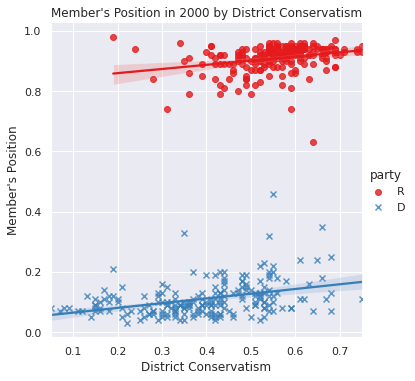

In [192]:
#Slope of regression
democrats = df[df.party == 'D']
republicans = df[df.party == 'R']
d = linregress(democrats["Bush '00"], democrats["conservative"])
r = linregress(republicans["Bush '00"], republicans["conservative"])

#Scatterplot
sns.lmplot(x="Bush '00", y='conservative', hue="party", 
           data=df,markers=["o", "x"], palette="Set1")
plt.xlabel("District Conservatism")
plt.ylabel("Member's Position")
plt.title("Member's Position in 2000 by District Conservatism")
print("Democratic slope: " + str(d.slope))
print("Republican slope: " + str(r.slope))